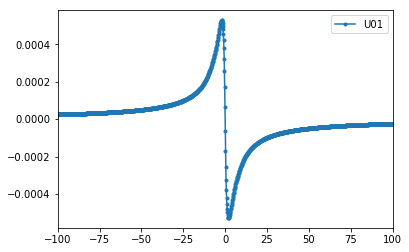

In [1]:

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


#逆温度
beta=40

#ω_n
n=np.arange(-1000,1001)
w_n=np.pi*(2*n+1)/beta

#t
t=np.linspace(0,beta,101)



def Self_energy_iwn(U):
    # G_iwnを求める。
    h=1/200#刻み幅
    #self_energy_iwn=np.zeros_like(w_n)
    g_matrix=1/(np.fromfunction(lambda i,j:1J*(np.pi*(2*(i-1000)+1)/beta)-2*np.tanh(np.pi/2*np.sinh((j-1000)*h)) , (2001,2001))-self_energy_iwn.reshape(-1,1))
    k=np.arange(-1000,1001)
    h_vector=np.cosh(k*h)/((np.cosh(np.pi/2*np.sinh(k*h)))**3)
    G_iwn=h*np.dot(g_matrix,h_vector)
    
    #グリーン関数と自己エネルギーを逆フーリエ変換して、iwn表示からt表示に変換。
    i_matrix=np.fromfunction(lambda i,j:np.exp(-1J*np.pi*(2*(j-1000)+1)*beta*i/(100*beta)), (101,2001))
    G_t=1/beta*np.dot(i_matrix,G_iwn-1/(1J*w_n))-1/2
    self_energy_t=1/beta*np.dot(i_matrix,self_energy_iwn)
    
    #上の二式からキャビティーグリーン関数を導出。
    cavity_g_t=1/(1/G_t+self_energy_t)
    
    #キャビティーグリーン関数を使って、新たな自己エネルギー（t表示）を導出。
    new_self_energy_t=(U**2)*(cavity_g_t**2)*cavity_g_t[::-1]
    
    #上で導出された新たな自己エネルギーをフーリエ変換して、t表示からiwn表示に変換。計算の精度を高めるために、スプライン補正を行う。
    #Nは０からbetaまでの分割数。Tは補正後の０からbetaまでの点。
    N=10000
    T=np.delete(np.linspace(0,beta,N+1), N)
    self_energy = interp1d(t, new_self_energy_t, kind="cubic")
    j_matrix=np.fromfunction(lambda i,j:np.exp(1J*np.pi*(2*(i-1000)+1)*(j)/N) ,(2001,N))
    new_self_energy_iwn=beta/N*np.dot(j_matrix,self_energy(T))
    return new_self_energy_iwn


#new_self_energy_iwnをどれだけ組み込むか。0<=k<=1.
k=0.3

#U=0.1の計算開始
#自己エネルギー。初期値0
self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U01=Self_energy_iwn(0.1)
relative_error_U01=np.abs((new_self_energy_iwn_U01-self_energy_iwn).imag/(new_self_energy_iwn_U01.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U01)>10**(-4)):
    new_self_energy_iwn_U01=Self_energy_iwn(0.1)
    relative_error_U01=np.abs((new_self_energy_iwn_U01-self_energy_iwn).imag/(new_self_energy_iwn_U01.imag))
    self_energy_iwn=k*new_self_energy_iwn_U01+(1-k)*self_energy_iwn
self_energy_iwn_U01=self_energy_iwn
#U=0.1の計算終了


plt.plot(w_n, self_energy_iwn_U01.imag, label='U01', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()



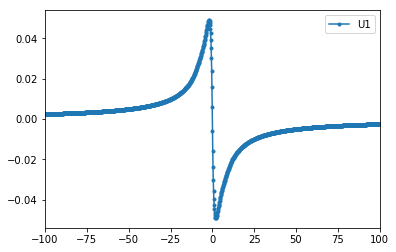

In [2]:
#U=1の計算開始
#自己エネルギー。初期値0
self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U1=Self_energy_iwn(1)
relative_error_U1=np.abs((new_self_energy_iwn_U1-self_energy_iwn).imag/(new_self_energy_iwn_U1.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U1)>10**(-4)):
    new_self_energy_iwn_U1=Self_energy_iwn(1)
    relative_error_U1=np.abs((new_self_energy_iwn_U1-self_energy_iwn).imag/(new_self_energy_iwn_U1.imag))
    self_energy_iwn=k*new_self_energy_iwn_U1+(1-k)*self_energy_iwn
self_energy_iwn_U1=self_energy_iwn
#U=1の計算終了

plt.plot(w_n, self_energy_iwn_U1.imag, label='U1', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


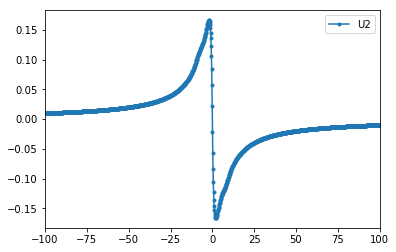

In [3]:
#U=2の計算開始
#自己エネルギー。初期値0
self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U2=Self_energy_iwn(2)
relative_error_U2=np.abs((new_self_energy_iwn_U2-self_energy_iwn).imag/(new_self_energy_iwn_U2.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U2)>10**(-4)):
    new_self_energy_iwn_U2=Self_energy_iwn(2)
    relative_error_U2=np.abs((new_self_energy_iwn_U2-self_energy_iwn).imag/(new_self_energy_iwn_U2.imag))
    self_energy_iwn=k*new_self_energy_iwn_U2+(1-k)*self_energy_iwn
self_energy_iwn_U2=self_energy_iwn
#U=1の計算終了

plt.plot(w_n, self_energy_iwn_U2.imag, label='U2', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


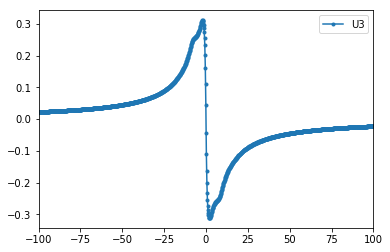

In [4]:
#U=3の計算開始
#自己エネルギー。初期値0
self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U3=Self_energy_iwn(3)
relative_error_U3=np.abs((new_self_energy_iwn_U3-self_energy_iwn).imag/(new_self_energy_iwn_U3.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U3)>10**(-4)):
    new_self_energy_iwn_U3=Self_energy_iwn(3)
    relative_error_U3=np.abs((new_self_energy_iwn_U3-self_energy_iwn).imag/(new_self_energy_iwn_U3.imag))
    self_energy_iwn=k*new_self_energy_iwn_U3+(1-k)*self_energy_iwn
self_energy_iwn_U3=self_energy_iwn
#U=3の計算終了

plt.plot(w_n, self_energy_iwn_U3.imag, label='U3', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


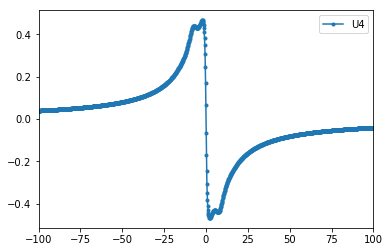

In [5]:
#U=4の計算開始
#自己エネルギー。初期値0
self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U4=Self_energy_iwn(4)
relative_error_U4=np.abs((new_self_energy_iwn_U4-self_energy_iwn).imag/(new_self_energy_iwn_U4.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U4)>10**(-4)):
    new_self_energy_iwn_U4=Self_energy_iwn(4)
    relative_error_U4=np.abs((new_self_energy_iwn_U4-self_energy_iwn).imag/(new_self_energy_iwn_U4.imag))
    self_energy_iwn=k*new_self_energy_iwn_U4+(1-k)*self_energy_iwn
self_energy_iwn_U4=self_energy_iwn
#U=4の計算終了

plt.plot(w_n, self_energy_iwn_U4.imag, label='U4', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


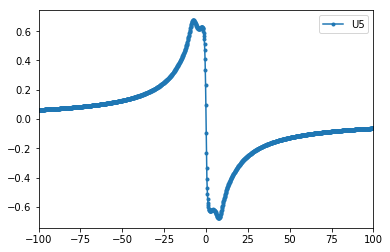

In [6]:



#U=5の計算開始
#自己エネルギー。初期値0
self_energy_iwn=np.zeros_like(w_n)
new_self_energy_iwn_U5=Self_energy_iwn(5)
relative_error_U5=np.abs((new_self_energy_iwn_U5-self_energy_iwn).imag/(new_self_energy_iwn_U5.imag))
#相対誤差が０.０0０１より小さくなるまでループ
while(np.max(relative_error_U5)>10**(-4)):
    new_self_energy_iwn_U5=Self_energy_iwn(5)
    relative_error_U5=np.abs((new_self_energy_iwn_U5-self_energy_iwn).imag/(new_self_energy_iwn_U5.imag))
    self_energy_iwn=k*new_self_energy_iwn_U5+(1-k)*self_energy_iwn
self_energy_iwn_U5=self_energy_iwn
#U=5の計算終了

plt.plot(w_n, self_energy_iwn_U5.imag, label='U5', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()

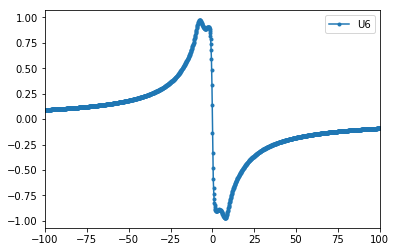

In [7]:

#U=6の計算開始
#自己エネルギー。初期値0
self_energy_iwn_U6=np.zeros_like(w_n)
new_self_energy_iwn_U6=Self_energy_iwn(6)
relative_error_U6=np.abs((new_self_energy_iwn_U6-self_energy_iwn_U6).imag/(new_self_energy_iwn_U6.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U6)>10**(-4)):
    new_self_energy_iwn_U6=Self_energy_iwn(6)
    relative_error_U6=np.abs((new_self_energy_iwn_U6-self_energy_iwn_U6).imag/(new_self_energy_iwn_U6.imag))
    self_energy_iwn_U6=k*new_self_energy_iwn_U6+(1-k)*self_energy_iwn_U6
#U=6の計算終了

plt.plot(w_n, self_energy_iwn_U6.imag, label='U6', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()

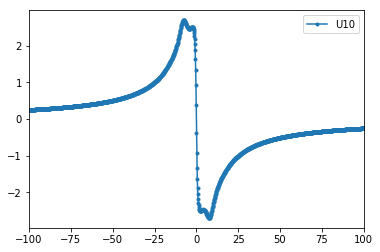

In [8]:


#U=10の計算開始
#自己エネルギー。初期値0
self_energy_iwn_U10=np.zeros_like(w_n)
new_self_energy_iwn_U10=Self_energy_iwn(10)
relative_error_U10=np.abs((new_self_energy_iwn_U6-self_energy_iwn_U10).imag/(new_self_energy_iwn_U10.imag))
#相対誤差が０.００0１より小さくなるまでループ
while(np.max(relative_error_U10)>10**(-4)):
    new_self_energy_iwn_U10=Self_energy_iwn(10)
    relative_error_U10=np.abs((new_self_energy_iwn_U10-self_energy_iwn_U10).imag/(new_self_energy_iwn_U10.imag))
    self_energy_iwn_U10=k*new_self_energy_iwn_U10+(1-k)*self_energy_iwn_U10
#U=10の計算終了

plt.plot(w_n, self_energy_iwn_U10.imag, label='U10', marker=".")
plt.xlim([-100,100]) 
plt.legend()
plt.show()


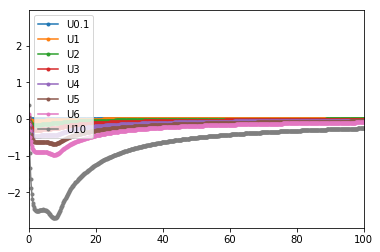

In [12]:
#U=0.1,1,2,3,4,5,6,10のグラフまとめ
plt.plot(w_n, self_energy_iwn_U01.imag, label='U0.1', marker=".")
plt.plot(w_n, self_energy_iwn_U1.imag, label='U1', marker=".")
plt.plot(w_n, self_energy_iwn_U2.imag, label='U2', marker=".")
plt.plot(w_n, self_energy_iwn_U3.imag, label='U3', marker=".")
plt.plot(w_n, self_energy_iwn_U4.imag, label='U4', marker=".")
plt.plot(w_n, self_energy_iwn_U5.imag, label='U5', marker=".")
plt.plot(w_n, self_energy_iwn_U6.imag, label='U6', marker=".")
plt.plot(w_n, self_energy_iwn_U10.imag, label='U10', marker=".")
plt.xlim([0,100]) 
plt.legend()
plt.show()

0.07853981633974483
[ 0.99918484  0.92788407  0.78246084  0.64508779  0.53689049  0.45498514
  0.36699379  0.17267497]


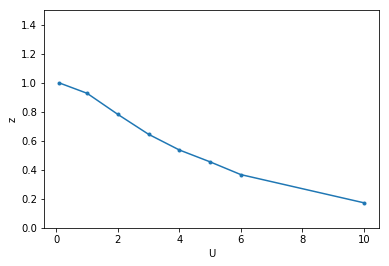

In [10]:
U=np.array([0.1,1,2,3,4,5,6,10])
self_energy_lowest=np.array([self_energy_iwn_U01.imag[1000],self_energy_iwn_U1.imag[1000],self_energy_iwn_U2.imag[1000],self_energy_iwn_U3.imag[1000],self_energy_iwn_U4.imag[1000],self_energy_iwn_U5.imag[1000],self_energy_iwn_U6.imag[1000],self_energy_iwn_U10.imag[1000]])
w_0=np.pi/beta
z=1/(1-self_energy_lowest/w_0)
print(w_0)
print(z)
plt.plot(U ,z , marker=".")
plt.ylim([0,1.5]) 
plt.xlabel("U")
plt.ylabel("z")
plt.show()